### A propos du dataset 

A partir de ce data frame on va prédire si un employé achètera un SUV ou non.
Elle présente plusieurs champs (features) : 
User ID : l'identifiant du client 
Gender : le sex du client Male or Female 
Age : l'age du client 
EstimatedSalary : le salaire du client 


### La collecte de données et importation des bibliothèques : Data Collecting 

In [16]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import math 

In [17]:
my_data=pd.read_csv("suv_data.csv")
my_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### L'analyse des données : Data Analysis 

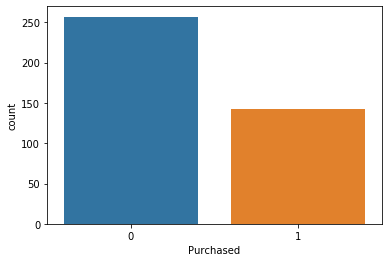

In [24]:
sns.countplot(x="Purchased",data=my_data)
#Déterminer le nombre des clients qui vont acheter ou non dans la totalité du data set 

### Train & test 

In [18]:
X=my_data.iloc[:,[2,3]].values
y=my_data.iloc[:,4].values

In [19]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression(random_state=0)
Classifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predictions=Classifier.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

83.33333333333334

In [33]:
#Maintenant on va travailler avec la colonne Gender qui est une colonne de type catégorique 
#on va faire tous les étapes en meme temps.
my_data=pd.read_csv("suv_data.csv")
gender=pd.get_dummies(my_data["Gender"],drop_first=True)

my_data=pd.concat([my_data,gender],axis=1)
my_data.drop(['User ID','Gender'],axis=1,inplace=True)
X=my_data.drop("Purchased",axis=1)
y=my_data['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
LR_model=LogisticRegression()
LR_model.fit(X_train,y_train)
predictions=LR_model.predict(X_test)
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

from sklearn.metrics import accuracy_score 
accuracy_score(y_test,predictions)*100  # un bon model (estimateur)

[[69  3]
 [47  1]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


58.333333333333336

In [34]:
#Le résultat d'évaluation montre que lorsqu'on contruit le model en laissant la variable Gender dans notre data set 
#la précision diminue par rapport à la premiere valeur de précision si on élimine Gender .